In [3]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Split the Dataset

In [4]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Data preprocessing

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model


In [6]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [7]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, 
                              training_labels, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 13s 18ms/step - loss: 0.4151 - accuracy: 0.7939 - val_loss: 0.3393 - val_accuracy: 0.8501
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2244 - accuracy: 0.9086 - val_loss: 0.3606 - val_accuracy: 0.8523
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1585 - accuracy: 0.9405 - val_loss: 0.3869 - val_accuracy: 0.8474
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 0.1118 - accuracy: 0.9596 - val_loss: 0.4607 - val_accuracy: 0.8462
Epoch 5/10
625/625 [==============================] - 10s 15ms/step - loss: 0.0769 - accuracy: 0.9737 - val_loss: 0.5137 - val_accuracy: 0.8429
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0498 - accuracy: 0.9834 - val_loss: 0.6420 - val_accuracy: 0.8435
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.6999 - val_accuracy:

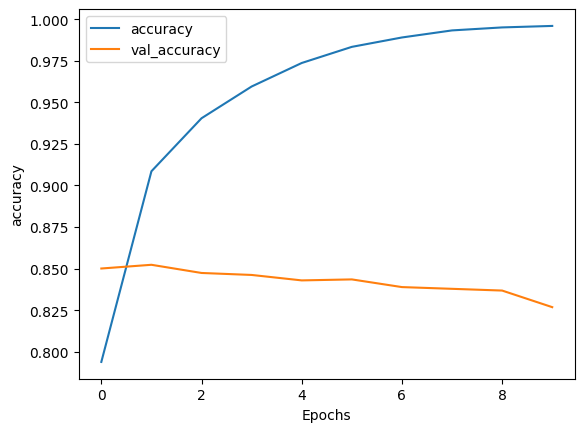

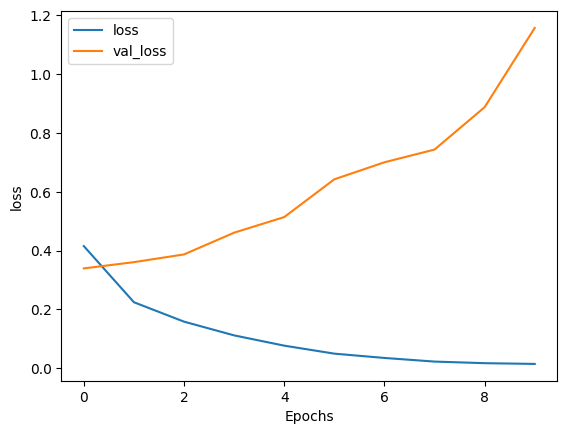

In [8]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')